# Ada Boost Machine Learning Model

Import required packages

In [1]:
import numpy as np # for multi-dimensional array operations
import pandas as pd # for reading data from .csv files
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA # for principle component analysis (dimensionality reduction)
from sklearn.model_selection import train_test_split # for splitting the dataset into training and testing sets
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold # for getting the best hyper parameters
from sklearn.preprocessing import MinMaxScaler # for scaling of data before PCA

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot

Assign the training set and testing set to variables for easy reference

In [6]:
train_set = pd.read_csv('../../Training and Testing sets/train_tfidf_features.csv') # import the training set
test_set = pd.read_csv('../../Training and Testing sets/test_tfidf_features.csv') # import the testing set

In [7]:
train_set_label = train_set.loc[:, ["label"]]
features_names = [str(i) for i in range(0, 5000)]
train_set_features = train_set.loc[:, features_names] # train_set_features will not contain the label and id columns
test_set_features = test_set.loc[:, features_names] # test_set_features will not contain the label and id columns

train_set_features.shape

(17184, 5000)

## Principal Component Analysis for train_set (90% variance)

In [ ]:
# combine test and train
frames = [train_set_features,test_set_features]
to_reduce = pd.concat(frames)

# scale the dataset before PCA
scaler = MinMaxScaler()
traintest_to_reduce = scaler.fit_transform(to_reduce)

# perform PCA
pca = PCA(n_components = 0.90)
train_test_reduced = pca.fit_transform(traintest_to_reduce)
train_test_reduced = pd.DataFrame(data = traintest_to_reduce)
train_test_reduced

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train = train_test_reduced.iloc[0:17184,:]
Y_train = train_set_label

X_test = train_test_reduced.iloc[17184:21480,:]

print(X_train.shape)
print(X_train.head(5))

print(Y_train.shape)
print(Y_train.head(5))

print(X_test.shape)
print(X_test.head(5))

(17184, 5000)
   0     1     2     3     4     5     6     7     8     9     ...  4990  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   4991  4992  4993  4994  4995  4996  4997  4998  4999  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 5000 columns]
(17184, 1)
   label
0      1
1      0
2      1
3      0
4      1
(4296, 5000)
       0     1     2     3     4     5     6     7     8     9     ...  4990  

## Tuning with Hyperparameter (Archive)

In [ ]:
# Parameters
# Number of tree in random forest 
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 5000, num =8)]

learning_rate = [0.1,1,2,5]

algorithm = ['SAMME.R','SAMME']

# Creating a param grid
random_grid = {'n_estimators':n_estimators,
            'algorithm': algorithm,}

print(random_grid)

{'n_estimators': [10, 722, 1435, 2148, 2861, 3574, 4287, 5000], 'algorithm': ['SAMME.R', 'SAMME']}


In [12]:
kfold = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0) # for 3-fold cross validation
grid = GridSearchCV(AdaBoostClassifier(), param_grid = random_grid, scoring = 'f1_macro', refit = 'f1_macro', n_jobs = 1 , cv = kfold, verbose = 2)
grid.fit(X_train, np.ravel(Y_train)) # training the model using the best hyper-parameters
print(grid.best_params_) # gets the best hyper-parameters for SVM

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .................algorithm=SAMME.R, n_estimators=10; total time=   7.5s
[CV] END .................algorithm=SAMME.R, n_estimators=10; total time=   7.5s
[CV] END .................algorithm=SAMME.R, n_estimators=10; total time=   7.2s


KeyboardInterrupt: 

## Tuning Parameters

### Hyperparameter Tuning: n_features
Evaluating the performance of different weak learners (different Decision Tree Classifiers with a range of max_depth) used in the ensemble model.

In [26]:
# get a list of models to evaluate
def get_ntree_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = AdaBoostClassifier(n_estimators=n)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores


# get the models to evaluate
models = get_ntree_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train, np.ravel(Y_train))
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>10 0.676 (0.009)
>50 0.691 (0.008)
>100 0.697 (0.008)
>500 0.705 (0.009)


/usr/local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 1.1.1 when using version 1.0.2. This might lead to breaking code or invalid results. 

TypeError: config_context() got an unexpected keyword argument 'pairwise_dist_chunk_size'

### Hyperparameter Tuning: Weak Learners
Evaluating the performance of different weak learners (different Decision Tree Classifiers with a range of max_depth) used in the ensemble model.

>1 0.806 (0.041)
>2 0.863 (0.028)
>3 0.865 (0.030)
>4 0.895 (0.029)
>5 0.913 (0.022)
>6 0.921 (0.024)
>7 0.925 (0.026)
>8 0.929 (0.024)
>9 0.931 (0.026)
>10 0.926 (0.024)


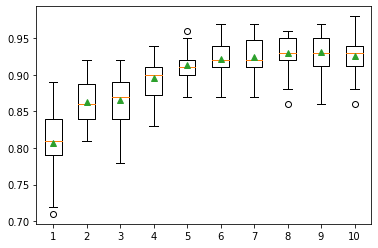

In [ ]:
# get a list of models to evaluate
def get_weaklearner_models():
	models = dict()
	# explore depths from 1 to 10
	for i in range(1,11):
		# define base model
		base = DecisionTreeClassifier(max_depth=i)
		# define ensemble model
		models[str(i)] = AdaBoostClassifier(base_estimator=base)
	return models

# get the models to evaluate
models = get_weaklearner_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train, np.ravel(Y_train))
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


### Hyperparameter Tuning: Learning Rate
Evaluating the performance of learning rateson the machine learning model.

>0.100 0.767 (0.049)
>0.200 0.786 (0.042)
>0.300 0.802 (0.040)
>0.400 0.798 (0.037)
>0.500 0.805 (0.042)
>0.600 0.795 (0.031)
>0.700 0.799 (0.035)
>0.800 0.801 (0.033)
>0.900 0.805 (0.032)
>1.000 0.806 (0.041)
>1.100 0.801 (0.037)
>1.200 0.800 (0.030)
>1.300 0.799 (0.041)
>1.400 0.793 (0.041)
>1.500 0.790 (0.040)
>1.600 0.775 (0.034)
>1.700 0.767 (0.054)
>1.800 0.768 (0.040)
>1.900 0.736 (0.047)
>2.000 0.682 (0.048)


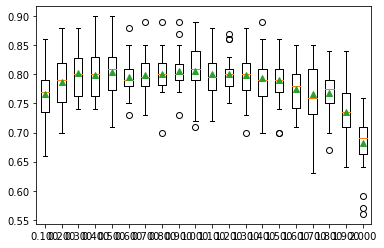

In [ ]:
# get a list of models to evaluate
def get_learningrate_model():
	models = dict()
	# explore learning rates from 0.1 to 2 in 0.1 increments
	for i in np.arange(0.1, 2.1, 0.1):
		key = '%.3f' % i
		models[key] = AdaBoostClassifier(learning_rate=i)
	return models

# get the models to evaluate
models = get_learningrate_model()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train, np.ravel(Y_train))
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### Hyperparameter Tuning: Explore with Alternate Algorithms
Evaluating the performance of different algorithms besides decision trees.

In [24]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
svc=SVC(probability=True, kernel='linear')
lr=LogisticRegression()
models=[svc,lr]
for i in models:
  model = AdaBoostClassifier(base_estimator=i)
  # evaluate the model
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(model, X_train, np.ravel(Y_train), scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  # report performance
  results.append(n_scores)
  names.append(i)
  print('Accuracy for {} : %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

## Using GridSearchCV to find interaction effects

In [3]:
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 100, 500, 1000]
grid['learning_rate'] = [0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=8, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro', refit = 'f1_macro')
# execute the grid search
grid_result = grid_search.fit(X_train, np.ravel(Y_train))
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

NameError: name 'X_train' is not defined

## Output Test Results (0.66135)

Predicting the labels for the test dataset based on the model with the best hyper-parameters

In [32]:
y_predicted = grid_result.predict(X_test)

In [34]:
# y_predicted = svc_model.predict(test_set_features)
y_predicted = pd.DataFrame(y_predicted, columns = ['label']) # convert y_predicted from nparray to pandas dataframe
y_predicted.insert(loc = 0, column = 'id', value = [i for i in range(17185, 17185 + 4296)]) # insert a column of the ids, starting from 17185
y_predicted.to_csv('skynet_submission_new.csv', index = False) # output the predicted labels to ./skynet_submission.csv

## Principal Component Analysis for train_set (95% variance)

In [8]:
# combine test and train
frames = [train_set_features,test_set_features]
to_reduce = pd.concat(frames)

# scale the dataset before PCA
scaler = MinMaxScaler()
traintest_to_reduce = scaler.fit_transform(to_reduce)

# perform PCA
pca = PCA(n_components = 0.95)
train_test_reduced = pca.fit_transform(traintest_to_reduce)
train_test_reduced = pd.DataFrame(data = traintest_to_reduce)
train_test_reduced

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X_train = train_test_reduced.iloc[0:17184,:]
Y_train = train_set_label

X_test = train_test_reduced.iloc[17184:21480,:]

print(X_train.shape)
print(X_train.head(5))

print(Y_train.shape)
print(Y_train.head(5))

print(X_test.shape)
print(X_test.head(5))

(17184, 5000)
   0     1     2     3     4     5     6     7     8     9     ...  4990  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   4991  4992  4993  4994  4995  4996  4997  4998  4999  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 5000 columns]
(17184, 1)
   label
0      1
1      0
2      1
3      0
4      1
(4296, 5000)
       0     1     2     3     4     5     6     7     8     9     ...  4990  

## Using GridSearchCV to find interaction effects

In [10]:
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500, 1000]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_macro', refit = 'f1_macro')
# execute the grid search
grid_result = grid_search.fit(X_train, np.ravel(Y_train))
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

## Output Test Results

Predicting the labels for the test dataset based on the model with the best hyper-parameters

In [ ]:
y_predicted = grid_result.predict(X_test)

In [ ]:
# y_predicted = svc_model.predict(test_set_features)
y_predicted = pd.DataFrame(y_predicted, columns = ['label']) # convert y_predicted from nparray to pandas dataframe
y_predicted.insert(loc = 0, column = 'id', value = [i for i in range(17185, 17185 + 4296)]) # insert a column of the ids, starting from 17185
y_predicted.to_csv('skynet_submission_new.csv', index = False) # output the predicted labels to ./skynet_submission.csv